notes for installing - had to install AND upgrade moviepy to get it working
1: install moviepy (with conda or pip)
2: upgrade moviepy (pip install --upgrade moviepy) (I think the version on conda might be old)
3: run the folloiwing commands in a python terminal
import imageio
imageio.plugins.ffmpeg.download()

hopefully that should work, if not try upgrading moviepy again

check by running import moviepy.editor


also for OpenCV I needed to run in the terminal
pip install opencv-contrib-python

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import tdt

import moviepy.editor as mv

import cv2 as cv

In [2]:
folder='C:\\Users\\jmc010\\Dropbox\\Shared and resource folders\\Dan Covey\\'

tank=folder+'SD6\\'
videofile = tank+'DAN_RR-190827-090229_SD6_Cam1.avi'

#tank=folder+'20Hz\\'
#videofile = tank+'DAN_RR-190827-090229_20Hz_Cam1.avi'

In [3]:
epocs = tdt.read_block(tank, evtype=['epocs']).epocs

Found Synapse note file: C:\Users\jmc010\Dropbox\Shared and resource folders\Dan Covey\SD6\Notes.txt
read from t=0s to t=418.45s


In [4]:
epocs

Tick	[struct]
Cam1	[struct]

In [5]:
ticks = epocs['Tick']['onset']
cam = epocs['Cam1']['onset']

print('There are {} ticks and {} camera timestamps/frames'.format(len(ticks), len(cam)))

There are 419 ticks and 7360 camera timestamps/frames


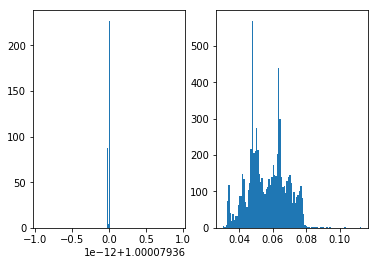

In [6]:
itis = np.diff(ticks)
ifis = np.diff(cam)

f, ax = plt.subplots(ncols=2)

ax[0].hist(itis)
ax[1].hist(ifis, bins=100);

In [7]:
print('The fastest instantaneous frame rate is {} Hz'.format(1/min(ifis)))
print('The slowest instantaneous frame rate is {} Hz'.format(1/max(ifis)))
print('The mean frame rate is {} Hz'.format(1/np.mean(ifis)))



The fastest instantaneous frame rate is 32.991976351361664 Hz
The slowest instantaneous frame rate is 8.87138898982682 Hz
The mean frame rate is 17.59858268875199 Hz


In [8]:
import math
R=100
pad_size = math.ceil(float(ifis.size)/R)*R - ifis.size
ifis_padded = np.append(ifis, np.zeros(pad_size)*np.NaN)
ifis_padded.shape

(7400,)

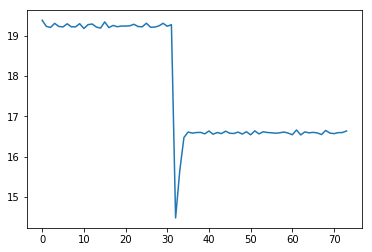

In [9]:
binned = np.nanmean(ifis_padded.reshape(-1, R), axis=1)
plt.plot(1/binned)

In [10]:
Fs_cam = 10
interval = 1/Fs_cam

maxframe = round(max(cam), 1)
minframe = round(min(cam), 1)

In [11]:
print(minframe, maxframe)

0.2 418.3


In [12]:
frames_out = np.arange(minframe, maxframe, interval)

In [13]:
len(frames_out)

4181

In [14]:
frame_index=[0]
for frame in frames_out:
    frame_index.append([i for i, f in enumerate(cam) if f > frame][0])

In [19]:
cap = cv.VideoCapture(videofile)

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output.avi', fourcc, 10.0, (800,  600))

for frame in frame_index:
    cap.set(cv.CAP_PROP_POS_FRAMES, frame)
    ret, frame = cap.read()
    if ret:
        out.write(frame)

cap.release()
out.release()
cv.destroyAllWindows()

In [ ]:
cap = cv.VideoCapture(videofile)

ret, frame = cap.read(800)
cv.imwrite("frame.jpg", frame)

cap.release()
cv.destroyAllWindows()

In [ ]:
clip=cv.VideoCapture('output.avi')

In [ ]:
dir(clip)

In [ ]:
clip.get


In [ ]:
clip.get(cv.CAP_PROP_FRAME_COUNT)

In [ ]:
len(cam)


In [ ]:
clip.release()

In [20]:
cam[1326]

69.04414208